Name: Ashish Benny
RegNo 21BPS1361

Customer Segmentation Dataset

## kaggle integration

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 4.28MB/s]


In [5]:
!unzip /content/customer-segmentation-tutorial-in-python.zip

Archive:  /content/customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


##Importing Libraries

In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
new_df=df.drop(columns='CustomerID',axis=1)
new_df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [34]:
new_df.shape

(200, 4)

##Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df['Gender']=le.fit_transform(new_df['Gender'])

##Fit Transform

In [21]:
from sklearn.preprocessing import MinMaxScaler
new_df=MinMaxScaler().fit_transform(new_df)
new_df

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

##Model Training

In [17]:
from sklearn import cluster

In [18]:
error=[]
for i in range(1,11):
  kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(new_df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [19]:
error

[86.68148216035944,
 37.27227241211876,
 29.552857611943857,
 22.39096001192855,
 19.07663788272297,
 16.42946794469996,
 14.22521748204564,
 12.223518502025357,
 10.600432969550852,
 9.399802915576311]

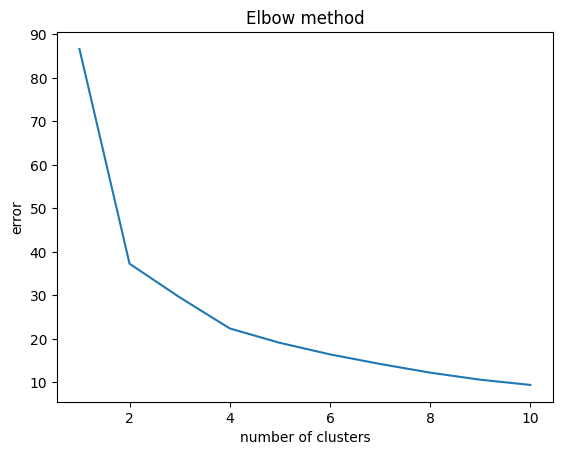

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel("number of clusters")
plt.ylabel('error')
plt.show()

In [22]:
km_model = cluster.KMeans(n_clusters=3,init = 'k-means++',random_state=0)

In [23]:
km_model.fit(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [40]:
pred=km_model.predict(new_df)
pred
new_df[0]

array([1.        , 0.01923077, 0.        , 0.3877551 ])

In [44]:
km_model.predict([[0,0.5,0.5,0.5]])

array([0], dtype=int32)

In [25]:
from sklearn.metrics import silhouette_score


In [26]:
silhouette_avg = silhouette_score(new_df,pred)
print('The average silhouette score is:', silhouette_avg)

The average silhouette score is: 0.45835255811254244
